In [1]:
# MAGIC099 - Exam (2020–2021)Numerical Methods in Python 
# Solution by Jan Cammann (j.cammann@lboro.ac.uk)

# Neccesary imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Question 1: Approximating e

### Approximating $\mathrm{e}$ using $\displaystyle \mathrm{e} = \lim_{n \to \infty}\left(1+\frac{1}{n}\right)^n$

In [2]:
def jacob_bernoulli(n_cutoff):
    n = np.arange(1,n_cutoff+1)
    return((1+1./n)**n)
display(Markdown(f"Approximation for $n=20$: $f_n={jacob_bernoulli(20)[-1]}$ with $|e-f_n| = {np.abs(np.e-jacob_bernoulli(20)[-1])}$"))

Approximation for $n=20$: $f_n=2.653297705144422$ with $|e-f_n| = 0.06498412331462289$

### Approximating $\mathrm{e}$ using $\displaystyle \mathrm{e} = \lim_{n \to \infty}\frac{n}{\sqrt[n]{n!}}$

In [3]:
def stirling(n_cutoff):
    n = np.arange(1,n_cutoff+1)
    factorial = np.cumprod(n)
    return n/(factorial**(1./n))
display(Markdown(f"Approximation for $n=20$: $f_n={stirling(20)[-1]}$ with $|e-f_n| = {np.abs(np.e-stirling(20)[-1])}$"))

Approximation for $n=20$: $f_n=2.408373083650825$ with $|e-f_n| = 0.30990874480822006$

### Approximating $\mathrm{e}$ using $\displaystyle \mathrm{e} = \lim_{N \to \infty} \sum_{n=0}^{N}\frac{1}{n!}$

In [4]:
def maclaurin(n_cutoff):
    n = np.arange(1,n_cutoff+1)
    factorial = np.cumprod(n)
    return 1+np.cumsum(1./factorial)
display(Markdown(f"Approximation for $n=20$: $f_n={maclaurin(20)[-1]}$ with $|e-f_n| = {np.abs(np.e-maclaurin(20)[-1])}$"))

Approximation for $n=20$: $f_n=2.7182818284590455$ with $|e-f_n| = 4.440892098500626e-16$

## Comparing the three previous approximations

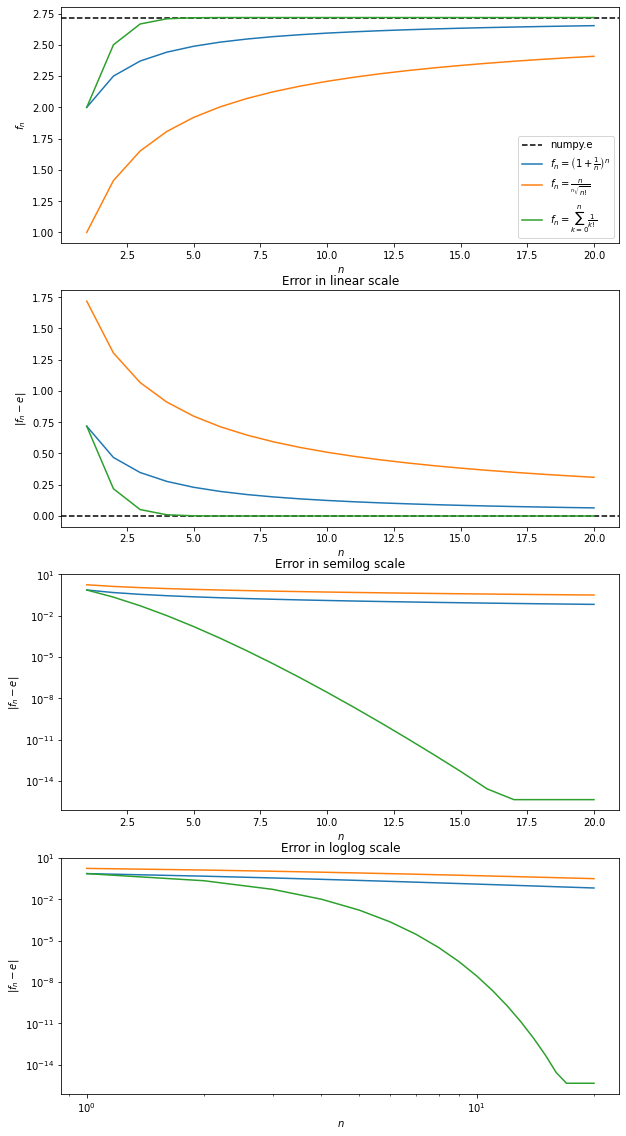

In [5]:
def plotter(n, approximations, expressions):
    fig, axes = plt.subplots(4,1, figsize = (10,20))
    [ax,ax_err, ax_err_semilog, ax_err_loglog] = axes
    ax.axhline(np.e, color="k",ls = "--", label="numpy.e")
    ax_err.axhline(0, color="k",ls = "--", label="numpy.e")
    for f_n, expression in zip(approximations, expressions):
        err = np.abs(np.e-f_n)
        ax.plot(n, f_n, label = r"$f_n=$"+expression)
        ax_err.plot(n, err)
        ax_err_semilog.plot(n, err)
        ax_err_loglog.plot(n, err)
        
    for ax_n in axes:
        ax_n.set_xlabel(r"$n$")
    ax.set_ylabel(r"$f_n$")
    for ax_n in axes[1:]:
        ax_n.set_ylabel(r"$|f_n-e|$")
    
    ax_err.set_title("Error in linear scale")
    ax_err_semilog.set_title("Error in semilog scale")
    ax_err_loglog.set_title("Error in loglog scale")
    ax_err_semilog.set_yscale("log")
    ax_err_loglog.set_xscale("log")
    ax_err_loglog.set_yscale("log")
    ax.legend()
    plt.show()
    return 


n_cutoff = 20
n = np.arange(1,n_cutoff+1)
jb = jacob_bernoulli(n_cutoff)
st = stirling(n_cutoff)
mc = maclaurin(n_cutoff)

expressions = [r"$\left(1+\frac{1}{n}\right)^n$", 
               r"$\frac{n}{^n\sqrt{n!}}$",
               r"$\sum_{k=0}^{n}\frac{1}{k!}$"]

plotter(n,[jb,st,mc], expressions)

## Discussion of approximation via $\int_1^\mathrm{e}\frac{1}{t}\mathrm{d}t = 1$

Since a large number of numerical integration methods exist, I will discuss the numerical approximation of $\mathrm{e}$ via the expression $\int_1^\mathrm{e}\frac{1}{t}\mathrm{d}t = 1$ only by the numerical integration techniques introduced in the lectures.
These are:
1. Methods based on a uniform grid:  
 - Rectangle rule  
 - Trapezoidal rule  
 - Simpson's method  
2. Gaussian quadrature methods

### Methods based on a uniform grid

The easiest approach to numerical integration is to approximate the function $f$ on the interval $[x_0,x_0+L]$ as a piecwise series of N simple functions the integral of which is known each defined on an interval of length $\Delta x =\frac{l}{N}$ using $x_i = x_0+i\Delta x$ and $f_i=f(x_i)$.

In the case of the rectangle rule $f$ is interpolated with constant functions (0th order polynomials) such that
$$
\int_{x_i}^{x_{i+1}} f(x) \,\mathrm{d}x = \Delta x f_i +\mathcal{O}(\Delta x^2 f')
$$
As an extension of this, $f$ can be interpolated pieceise using linear functions (1st order polynomials) such that
$$
\int_{x_i}^{x_{i+1}} f(x) \,\mathrm{d}x = \Delta x \frac{f_i+f_{i+1}}{2} +\mathcal{O}(\Delta x^3 f'').
$$
Simpson's method extends this approach to second order polynomials, requiring one more point for interpolation
$$
\int_{x_i}^{x_{i+2}} f(x) \,\mathrm{d}x = \Delta x \left(\frac{f_i}{3}+\frac{4f_{i+1}}{3}+\frac{f_{i+2}}{3}\right) +\mathcal{O}(\Delta x^5 f^{(4)}).
$$


Fixing the stepsize $\Delta x$ one can approximate $\mathrm{e}$ by iteratively computing $\int_{0}^{n\Delta x}\frac{1}{t}\mathrm{d}t = \alpha$ for increasing $n$. Once $\alpha$ passes 1, the approximation for $\mathrm{e}$ is $n\Delta x$

### Definition of the function to integrate and the iterative integration

In [6]:
def f(x):
    return 1./x

def iterative_integral(dx, f, method , target = 1.,x_0=1):
    integral = 0.
    n_iter = 0
    if method == "rect":
        x = x_0
        f_i=f(x)
        while integral<target/dx:
            integral += f_i
            x+=dx
            f_i=f(x)
            n_iter += 1
    if method == "trap":
        x = x_0
        f_i=f(x)
        while integral<target/dx:
            x+=dx
            f_i1 = f(x)
            integral += (f_i+f_i1)/2.
            f_i = f_i1
            n_iter += 1
    if method == "simpson":
        x = x_0
        f_i=f(x)
        f_i1 = f(x+dx)
        while integral<target/dx:
            x+=2*dx
            f_i2 = f(x)
            f_i1 = f(x-dx)
            integral += (f_i+4*f_i1+f_i2)/3
            f_i=f_i2
            n_iter += 1
            
    return x, n_iter

### Calculating approximation of $\mathcal{e}$ via different integration methods:

In [7]:
dx = []
approximation_rect = []
approximation_trap = []
approximation_simpson = []
n_iter_rect = []
n_iter_trap = []
n_iter_simpson = []

for i in np.logspace(1,6,50):
    dx.append(1/i)
    x,n = iterative_integral(1./i,f,"rect")
    approximation_rect.append(x)
    n_iter_rect.append(n)
    
    x,n = iterative_integral(1./i,f,"trap")
    approximation_trap.append(x)
    n_iter_trap.append(n)
    
    x,n = iterative_integral(1./i,f,"simpson")
    approximation_simpson.append(x)
    n_iter_simpson.append(n)

dx = np.array(dx)

approximation_rect = np.array(approximation_rect)
n_iter_rect = np.array(n_iter_rect)

approximation_trap = np.array(approximation_trap)
n_iter_trap = np.array(n_iter_trap)
    
approximation_simpson = np.array(approximation_simpson)
n_iter_simpson = np.array(n_iter_simpson)

### Plotting the results

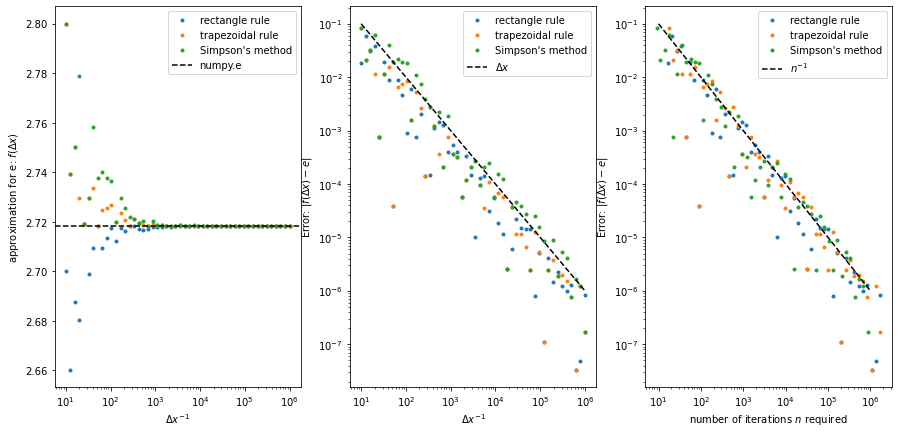

In [8]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(15,7))
ax1.plot(1./dx,approximation_rect,".", label = "rectangle rule")
ax1.plot(1./dx,approximation_trap,".", label = "trapezoidal rule")
ax1.plot(1./dx,approximation_simpson,".", label = "Simpson's method")
ax1.axhline(np.e,color = "k", ls = "--", label = "numpy.e")
ax1.set_xlabel(r"$\Delta x^{-1}$")
ax1.set_ylabel(r"approximation for $\mathrm{e}$: $f(\Delta x)$")
ax1.set_xscale("log")
ax1.legend()

ax2.plot(1./dx,np.abs(np.e-approximation_rect),".", label = "rectangle rule")
ax2.plot(1./dx,np.abs(np.e-approximation_trap),".", label = "trapezoidal rule")
ax2.plot(1./dx,np.abs(np.e-approximation_simpson),".", label = "Simpson's method")
ax2.set_xlabel(r"$\Delta x^{-1}$")
ax2.set_ylabel(r"Error: $|f(\Delta x)-e|$")
n = np.array([1.e1,1.e6])
ax2.plot(n,1/n, "k--", label = r"$\Delta x$")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.legend()

ax3.plot(n_iter_rect, np.abs(np.e-approximation_rect),".", label = "rectangle rule")
ax3.plot(n_iter_trap, np.abs(np.e-approximation_trap),".", label = "trapezoidal rule")
ax3.plot(n_iter_simpson, np.abs(np.e-approximation_simpson),".", label = "Simpson's method")
ax3.set_xlabel(r"number of iterations $n$ required")
ax3.set_ylabel(r"Error: $|f(\Delta x)-e|$")
n = np.array([1.e1,1.e6])
ax3.plot(n,1/n, "k--", label = r"$n^{-1}$")
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.legend()
plt.show()

The comparison of the three integration methods based on uniform grids shows very clearly, that within the range explored, the superior error in Simpson's method is offset by the spacing of the integration grid $\Delta x$. This becomes evident when comparing the stepsize $\Delta x$ with the error, where on average Simpson's method performs worse than the other two, because it only allows the increase of the integration interval by multiple of $2\Delta x$. Therefore it only needs half the interation steps to cover the interval $[1,e]$ (but at the cost of two function evaluations per step as opposed to one for the other two methods.)

The stepwise extension of the iteration interval by $\Delta x$ introduces an error $\mathcal{0}(\Delta x)$, dominates, over the higher accuarcies of the integration methods, as is evident by the scaling of the error with $\Delta x^{-1}$, irrespective of the method.

### Gaussian quadratures
The method of Gaussian quadratures does not allow for a trivial iterative increase of the integration interval, hence other mehthods of finding the point where the integral passes 1 have to be used. An option is the employment of root finding methods on the function $f(x) =\int_1^x \frac{1}{t}\,\mathrm{d}t -1$.
Though it would be possible to use the bisection method or Ridder's method, the Newton-Raphson method has a superior convergence as it not only uses f(x), but also f'(x). Luckyly the derivative is trivially calculated in this case as
$$
f'(x)=\frac{\mathrm{d}}{\mathrm{d}x}\left(\int_1^x \frac{1}{t}\,\mathrm{d}t -1 \right)= \frac{1}{x}.
$$

In [9]:
import scipy.integrate as spi
import scipy.optimize as spo

tol = 1.e-8

def f_prime(x):
    return 1./x

def f_quad(x):
    integral, estimateDiff = spi.quadrature(f_prime, 1., x, tol=tol)
    return integral - 1

x_0 = 3
estimate, root_results=spo.newton(f_quad, 3, fprime=f_prime, maxiter=1000, tol = tol, full_output = True)
print(root_results)
print(f"\nerror |root-np.e|: {np.abs(estimate-np.e)}")

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 4
           root: 2.718281829137346

error |root-np.e|: 6.783009709465659e-10


# Question 2: Orbital dynamics

## Implementation of the ODE right-hand side

In [10]:
n_dims = 2
def rhs_gravity(t, state, m):
    rhs = np.zeros(state.shape)
    for i,rhs_i in enumerate(rhs):
        rhs_i[:n_dims] = state[i,n_dims:]/m[i] 
        q_i = state[i,:n_dims]
        for j,q_j in enumerate(state[:,:n_dims]):
            if i!=j:
                d = q_j-q_i
                d3 = np.linalg.norm(d)**3
                rhs_i[n_dims:] += m[i]*m[j]*d/d3 
    return rhs
        

## Implementation of Runge-Kutta 45

In [11]:
def rk45(t,state,dt,rhs, additional_data):
    k1 = dt*rhs(t,state,additional_data)
    k2 = dt*rhs(t+0.5*dt,state+0.5*k1,additional_data)
    k3 = dt*rhs(t+0.5*dt,state+0.5*k2,additional_data)
    k4 = dt*rhs(t+dt,state+k3,additional_data)
    return k1/6+k3/3+k3/3+k4/6
    

## Numerical integration

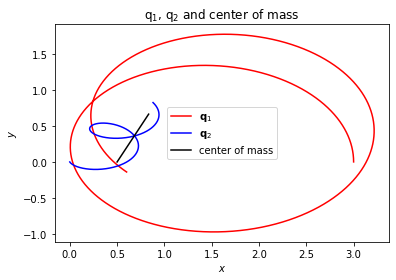

In [12]:
n_particles = 2
state = np.zeros((n_particles,4))
mass = np.array([1,5])

state[0] = [3., 0., 0. , 0.8]
state[1] = [0., 0., 0.2, -0.40]

dt = 0.001
t=0.
pos0 = []
pos1 = []
t_max = 10.
while t<t_max:
    state += rk45(t,state,dt,rhs_gravity,mass) 
    pos0.append(state[0,:2].copy())
    pos1.append(state[1,:2].copy())
    t+=dt

pos0=np.array(pos0).T
pos1=np.array(pos1).T
plt.plot(*pos0,"r-", label="$\mathbf{q}_1$")
plt.plot(*pos1,"b-", label="$\mathbf{q}_2$")
#center of mass
cm = (pos0*mass[0]+pos1*mass[1])/np.sum(mass)
plt.plot(*cm,"k-",label="center of mass")

plt.title(r"$\mathrm{q}_1$, $\mathrm{q}_2$ and center of mass")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

## Dynamics relative to the center of mass and calculation of velocity and acceleration components via spline interpolation

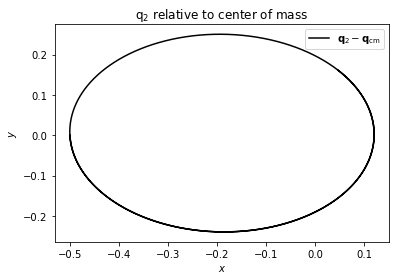

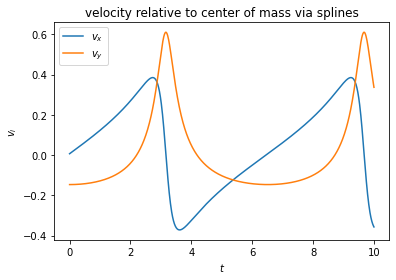

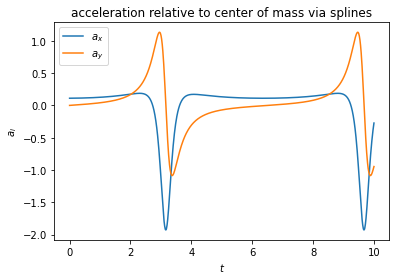

In [13]:
#q2 relative to center of mass
pos1_bar = pos1-cm
plt.plot(*pos1_bar,"k-",label="$\mathbf{q}_2-\mathbf{q}_\mathrm{cm}$")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.title(r"$\mathrm{q}_2$ relative to center of mass")
plt.show()

from scipy.interpolate import splrep, splev
spl0 = splrep(np.arange(len(pos1_bar[0]))*dt, pos1_bar[0], s=0)
spl1 = splrep(np.arange(len(pos1_bar[1]))*dt, pos1_bar[1], s=0)

smallGrid=np.linspace(0, t_max, 1000)
v0=splev(smallGrid, spl0, der=1)
v1=splev(smallGrid, spl1, der=1)
plt.plot(smallGrid, v0, '-', label = r"$v_x$")
plt.plot(smallGrid, v1, '-', label = r"$v_y$")
plt.xlabel(r"$t$")
plt.ylabel(r"$v_i$")
plt.legend()
plt.title(r"velocity relative to center of mass via splines")
plt.show()

a0=splev(smallGrid, spl0, der=2)
a1=splev(smallGrid, spl1, der=2)
plt.plot(smallGrid, a0, '-', label = r"$a_x$")
plt.plot(smallGrid, a1, '-', label = r"$a_y$")
plt.xlabel(r"$t$")
plt.ylabel(r"$a_i$")
plt.legend()
plt.title(r"acceleration relative to center of mass via splines")
plt.show()

# Question 3: Random walkers
## Discrete walkers
### Implementation of walkers with an equal chance of going left or right at each step

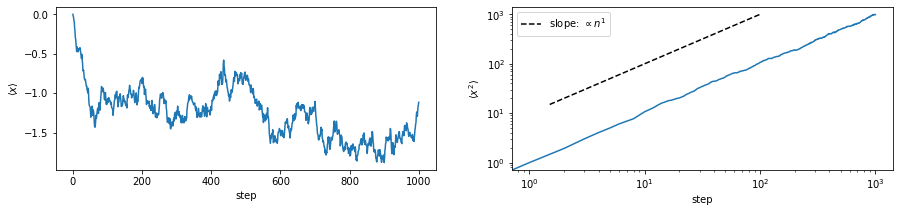

In [14]:
n_walkers = 500
walkers = np.zeros(n_walkers, dtype = np.int64)
step = 0
max_steps = 1000
sample_steps = np.array([10,100,1000])
dt = 1.
samples = []
np.random.seed(hash("magic099")%(2**32 - 1))
mean = []
var = []
# simulate random steps
while step<=max_steps:
    mean.append(np.mean(walkers))
    var.append(np.var(walkers))
    walkers += np.random.choice([1,-1],n_walkers)
    step += 1
    if step in sample_steps:
        samples.append(walkers.copy())

fig, axes =plt.subplots(1,2, figsize=(15,3))
axes[0].plot(mean)
axes[0].set_xlabel("step")
axes[0].set_ylabel(r"$\langle x\rangle$")
axes[1].loglog(var)
axes[1].set_xlabel("step")
axes[1].set_ylabel(r"$\langle x^2\rangle$")

# simple slope indicator as guide for the eye
x = np.array([1.5,0.1*max_steps])
axes[1].plot(x,10*x, "k--", label="slope: $\propto n^1$")
axes[1].legend()
plt.show()
        
        
        

### Sampled histograms

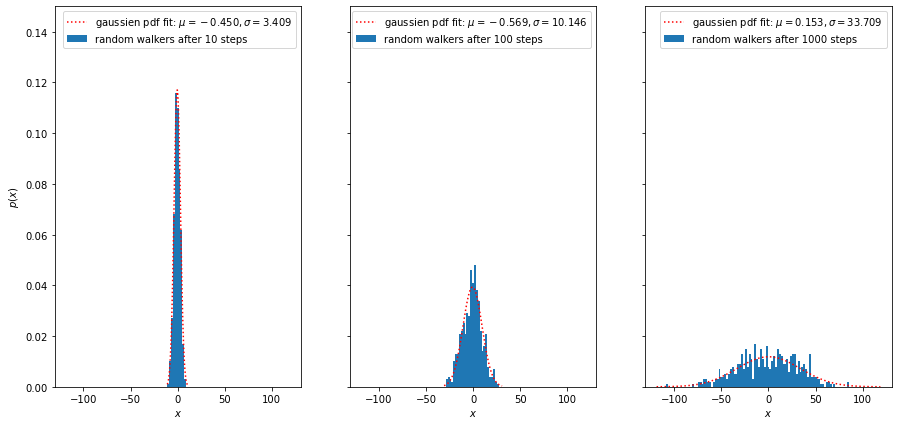

In [15]:
from scipy.optimize import curve_fit
def gaus(x,x0,sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-x0)**2/(2*sigma**2))

        
# plotting
fig, axes = plt.subplots(1,len(sample_steps), figsize=(15,7), sharey=True, sharex=True)
for ax,sample,step in zip(axes,samples, sample_steps):    
    maxspread = np.max(np.abs(sample))
    bins = np.arange(-maxspread,maxspread+2,step=2)
    hist,_ = np.histogram(sample, bins=bins,density=True)
    ax.bar(bins[:-1], hist, width=2, label = rf"random walkers after {step} steps")
    
    #gaussian fit
    popt,pcov = curve_fit(gaus,bins[:-1],hist,p0=[np.mean(sample),np.std(sample)])
    x = np.linspace(-1.1*maxspread, 1.1*maxspread,100)
    ax.plot(x,gaus(x,*popt),'r:',label=rf'gaussien pdf fit: $\mu={popt[0]:.3f}, \sigma={popt[1]:.3f}$')
    
    ax.set_xlabel(r"$x$")
    ax.legend(loc = 1)
axes[0].set_ylim((0,0.15))
axes[0].set_ylabel(r"$p(x)$")
pass

## 1D Heat equation with FFT

In [16]:
#Parameters and initial conditions
N=128
dx = 1
D = 1./2.
x =np.arange(-N,N,dx)
u_0 = np.zeros(x.shape)
u_0[x.shape[0]//2]=1

sample_times = sample_steps*dt

#Fourier transform initial condition
uTilde=np.fft.rfft(u_0)
# get k values
k = np.fft.rfftfreq(x.shape[0],dx)*(2.*np.pi)

### 1st path to a solution: Analytical treatment in Fourier space
Note: $\partial_\alpha$ is to be read as $\frac{\partial}{\partial \alpha}$

PDE:
$$
\partial_t u = D\partial_x^2 u
$$
Let $\mathcal{F}[u(x)](k) = \tilde u(k)$ 
$$
\partial_t \tilde u = -Dk^2 \tilde u
$$
Linearity makes all modes k decouple
$$
\rightarrow \tilde u(t)=\exp(-Dk^2)\tilde u_0 \quad\text{where}\quad \tilde u_0=\tilde u(t=0)
$$

In [17]:
samples_ana = []

for t in sample_times:
    # calculate \tilde{u}(t) and perform inverse fourier transform
    finCond=np.fft.irfft(np.multiply(uTilde, np.exp(-D*k**2*t)))
    samples_ana.append(finCond)


# Alternate solution via time stepping scheme
The rk45 method implemented for the gravity exercise can be reused

In [18]:
samples_ts = []
t = 0.
dt = 0.1
def rhs_heat(t,uTilde,D):
    return uTilde* -D*k**2
for t_sample in sample_times:
    while t<t_sample-dt/10:
        # Euler step 
        # uTilde += rhs_heat(t,uTilde,D)*dt
        
        # Runge-Kutta 45
        uTilde += rk45(t,uTilde,dt,rhs_heat,D) 
        
        t +=dt
    
    u=np.fft.irfft(uTilde)
    samples_ts.append(u)
    

### Plotting

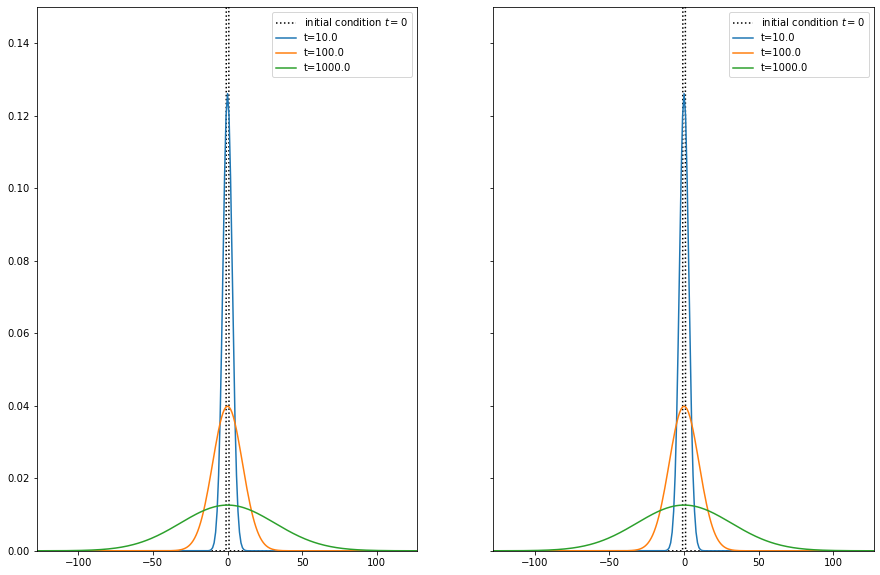

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15,10), sharex = True, sharey= True)
# plot initial condtion
for ax in axes:
    ax.plot(x,u_0,"k:", label=r"initial condition $t=0$")
    
for t, u_a, u_ts in zip(sample_times, samples_ana, samples_ts):
    axes[0].plot(x, u_a, label=rf"t={t}")
    axes[1].plot(x, u_ts, label=rf"t={t}")

for ax in axes:
    ax.legend()
    ax.set_ylim((0,0.15))
    ax.set_xlim((x[0],x[-1]))
plt.show()

## Comparison of heat equation and discrete walkers

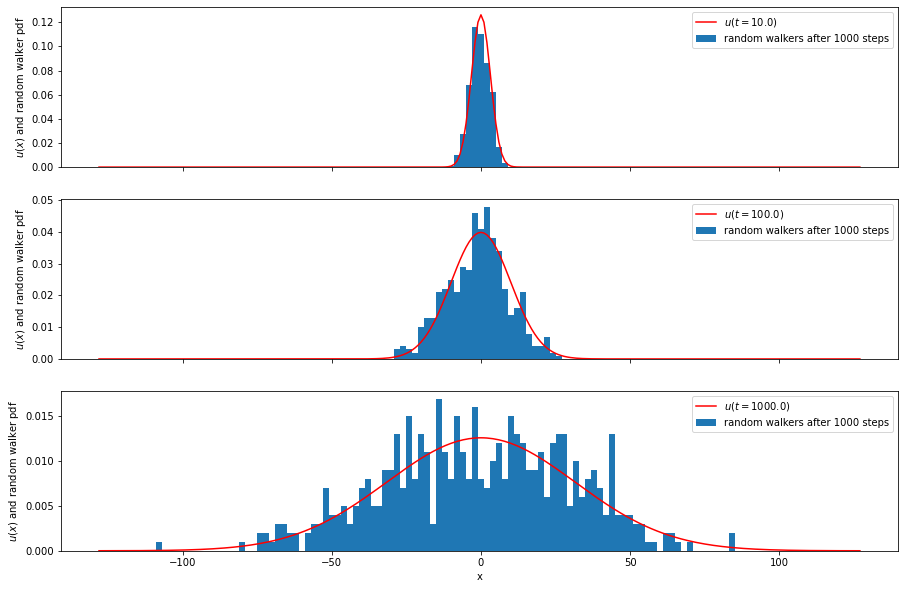

In [20]:
fig, axes = plt.subplots(len(sample_times), figsize=(15,10), sharex = True)
for ax, t, sample, u in zip(axes, sample_times, samples,samples_ana):
    maxspread = np.max(np.abs(sample))
    bins = np.arange(-maxspread,maxspread+2,step=2)
    hist,_ = np.histogram(sample, bins=bins,density=True)
    ax.bar(bins[:-1], hist, width=2, label = rf"random walkers after {step} steps")
    ax.set_ylabel(r"$u(x)$ and random walker pdf")
    ax.plot(x, u, "r-", label=rf"$u(t={t})$")
    ax.legend()
axes[-1].set_xlabel("x")
plt.show()

As evident by the above plots, the heat equation is the natural extension of a set of random walkers in the continuum limit. In this particular case, the comparison only works for values of $t$ where $\sqrt{\langle x^2\rangle}<L$ where $L$ is half the length of the simulated domain, as the walkers will eventually spread out over an infinite space, whereas the heat eq. in periodic boundary conditions will produce a constant density only within the simulation domain as $t\rightarrow\infty$. To also reach an agreement for large times, either the walkers have to be placed within a periodic domain as well, or the heat eqaution has to be solved for open boundary conditions.

# Code
The code within this document is available at https://github.com/jcammann/magic099_exam

In [21]:
# import antigravity